In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')
from time import time
%matplotlib inline
import plotly
import datetime
import matplotlib.dates as mdates
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.subplots import make_subplots
import os
os.getcwd()
os.chdir("C:/Users/Lekhasree Uddanti/Desktop/SVMModel")

In [2]:
#data1=pd.read_csv('/content/GannavaramAirportData.csv')
df=pd.read_csv('HyderabadAirportData.csv')
#data3=pd.read_csv('/content/DelhiAirportData.csv')
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (34, 4)


,AirportName,TimeStamp,BarcodeData,ServiceUsed
0,Hyderabad,7/28/2020 4:39,7.060000e+11,Arrival Baggage Belt
1,Hyderabad,7/28/2020 6:39,7.060000e+11,Parking Stands
2,Hyderabad,7/28/2020 7:39,7.060000e+11,Boarding Gates
3,Hyderabad,7/28/2020 8:39,7.060000e+11,Trolleys
4,Hyderabad,7/28/2020 9:39,7.060000e+11,Currency Exchange


In [3]:
df['TimeStamp']=pd.to_datetime(df['TimeStamp']) 
df['year'] = df['TimeStamp'].apply(lambda x: x.year)
df['month'] = df['TimeStamp'].apply(lambda x: x.month)
df['day'] = df['TimeStamp'].apply(lambda x: x.day)
df.sort_values('TimeStamp', inplace=True, ascending=True)

In [4]:
df1 = df.groupby(["AirportName","year","month","day","ServiceUsed"]).size().reset_index(name="Units")
df1

,AirportName,year,month,day,ServiceUsed,Units
0,Hyderabad,2020,7,28,Arrival Baggage Belt,4
1,Hyderabad,2020,7,28,Boarding Gates,4
2,Hyderabad,2020,7,28,Currency Exchange,1
3,Hyderabad,2020,7,28,Information Desk,2
4,Hyderabad,2020,7,28,Luggage Storage,2
5,Hyderabad,2020,7,28,Parking Stands,3
6,Hyderabad,2020,7,28,Trolleys,5
7,Hyderabad,2020,7,29,Arrival Baggage Belt,3
8,Hyderabad,2020,7,29,Information Desk,4
9,Hyderabad,2020,7,29,Trolleys,6


In [5]:
dt = pd.to_datetime(df1['day'].astype(str)+"/"+df1['month'].astype(str)+"/"+df1["year"].astype(str))
df2 = df1.iloc[: , [0, 4, 5]].copy() 
df2['TimeStamp'] = dt
df2

,AirportName,ServiceUsed,Units,TimeStamp
0,Hyderabad,Arrival Baggage Belt,4,2020-07-28
1,Hyderabad,Boarding Gates,4,2020-07-28
2,Hyderabad,Currency Exchange,1,2020-07-28
3,Hyderabad,Information Desk,2,2020-07-28
4,Hyderabad,Luggage Storage,2,2020-07-28
5,Hyderabad,Parking Stands,3,2020-07-28
6,Hyderabad,Trolleys,5,2020-07-28
7,Hyderabad,Arrival Baggage Belt,3,2020-07-29
8,Hyderabad,Information Desk,4,2020-07-29
9,Hyderabad,Trolleys,6,2020-07-29


Text(0.5, 1.0, 'Service Usage')

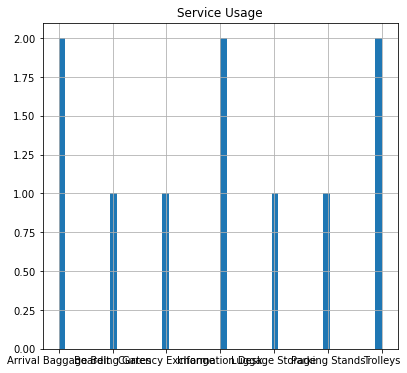

In [6]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df1['ServiceUsed'].hist(bins=50)
plt.title('Service Usage')

In [7]:
s1 = df2.loc[df2['ServiceUsed'] == 'Arrival Baggage Belt'] 
s2 = df2.loc[df2['ServiceUsed'] == 'Boarding Gates'] 
s3 = df2.loc[df2['ServiceUsed'] == 'Currency Exchange']
s4 = df2.loc[df2['ServiceUsed'] == 'Information Desk']
s5 = df2.loc[df2['ServiceUsed'] == 'Luggage Storage']
s6 = df2.loc[df2['ServiceUsed'] == 'Parking Stands']
s7 = df2.loc[df2['ServiceUsed'] == 'Trolleys']

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder()
df2['ServiceUsed']= label_encoder.fit_transform(df2['ServiceUsed']) 
df2['AirportName']= label_encoder.fit_transform(df2['AirportName'])
df2['TimeStamp'] = df2['TimeStamp'].map(mdates.date2num)

In [9]:
df2

,AirportName,ServiceUsed,Units,TimeStamp
0,0,0,4,737634.0
1,0,1,4,737634.0
2,0,2,1,737634.0
3,0,3,2,737634.0
4,0,4,2,737634.0
5,0,5,3,737634.0
6,0,6,5,737634.0
7,0,0,3,737635.0
8,0,3,4,737635.0
9,0,6,6,737635.0


In [10]:
array = df2.values
x = array[:,[0,1,3]]
y = array[:,2]

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=109) 

In [12]:
from sklearn import svm
svr_rbf = svm.SVR(kernel='rbf',C= 1e3, gamma=0.1, epsilon=.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [13]:
y_pred=svr_rbf.predict(x_test)
y_pred

array([3.10749584, 1.94492952])

**S1: Arrival Baggage Belt**

In [14]:
label_encoder = preprocessing.LabelEncoder()
s1['ServiceUsed']= label_encoder.fit_transform(s1['ServiceUsed']) 
s1['AirportName']= label_encoder.fit_transform(s1['AirportName'])
s1['TimeStamp'] = s1['TimeStamp'].map(mdates.date2num)
array = s1.values
x = array[:,[0,1,3]]
y = array[:,2]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=109) 
svr_rbf = svm.SVR(kernel='rbf',C= 1e3, gamma=0.1, epsilon=.1) 
svr_rbf.fit(x_train, y_train)
ps1 = svr_rbf.predict(x)
ps1

array([4., 4.])

In [15]:
len1 = sum(ps1)
len1

8.0

**S2: Boarding Gates**

In [16]:
#label_encoder = preprocessing.LabelEncoder()
s2['ServiceUsed']= label_encoder.fit_transform(s2['ServiceUsed']) 
s2['AirportName']= label_encoder.fit_transform(s2['AirportName'])
s2['TimeStamp'] = s2['TimeStamp'].map(mdates.date2num)
array = s2.values
x = array[:,[0,1,3]]
y = array[:,2]
x_train,y_train= x,y
svr_rbf = svm.SVR(kernel='rbf',C= 1e3, gamma=0.1, epsilon=.1) 
svr_rbf.fit(x_train, y_train)
ps2 = svr_rbf.predict(x)
ps2

array([4.])

In [17]:
len2 = sum(ps2)
len2

4.0

**S3: Currency Exchange**

In [18]:
#label_encoder = preprocessing.LabelEncoder()
s3['ServiceUsed']= label_encoder.fit_transform(s3['ServiceUsed']) 
s3['AirportName']= label_encoder.fit_transform(s3['AirportName'])
s3['TimeStamp'] = s3['TimeStamp'].map(mdates.date2num)
array = s3.values
x = array[:,[0,1,3]]
y = array[:,2]
x_train,y_train= x,y 
svr_rbf = svm.SVR(kernel='rbf',C= 1e3, gamma=0.1, epsilon=.1) 
svr_rbf.fit(x_train, y_train)
ps3 = svr_rbf.predict(x)
ps3

array([1.])

In [19]:
len3 = sum(ps3)
len3

1.0

**S4: Information Desk**

In [20]:
s4['ServiceUsed']= label_encoder.fit_transform(s4['ServiceUsed']) 
s4['AirportName']= label_encoder.fit_transform(s4['AirportName'])
s4['TimeStamp'] = s4['TimeStamp'].map(mdates.date2num)
array = s4.values
x = array[:,[0,1,3]]
y = array[:,2]
x_train, y_train=x,y
svr_rbf = svm.SVR(kernel='rbf',C= 1e3, gamma=0.1, epsilon=.1) 
svr_rbf.fit(x_train, y_train)
ps4 = svr_rbf.predict(x)
ps4

array([2.09999989, 3.90000011])

In [21]:
len4 = sum(ps4)
len4

6.0

**S5: Luggage Storage**

In [22]:
s5['ServiceUsed']= label_encoder.fit_transform(s5['ServiceUsed']) 
s5['AirportName']= label_encoder.fit_transform(s5['AirportName'])
s5['TimeStamp'] = s5['TimeStamp'].map(mdates.date2num)
array = s5.values
x = array[:,[0,1,3]]
y = array[:,2]
x_train,y_train= x,y
svr_rbf = svm.SVR(kernel='rbf',C= 1e3, gamma=0.1, epsilon=.1) 
svr_rbf.fit(x_train, y_train)
ps5 = svr_rbf.predict(x)
ps5

array([2.])

In [23]:
len5 = sum(ps5)
len5

2.0

**S6: Parking Stands**

In [24]:
s6['ServiceUsed']= label_encoder.fit_transform(s6['ServiceUsed']) 
s6['AirportName']= label_encoder.fit_transform(s6['AirportName'])
s6['TimeStamp'] = s6['TimeStamp'].map(mdates.date2num)
array = s6.values
x = array[:,[0,1,3]]
y = array[:,2]
x_train,y_train= x,y
svr_rbf = svm.SVR(kernel='rbf',C= 1e3, gamma=0.1, epsilon=.1) 
svr_rbf.fit(x_train, y_train)
ps6 = svr_rbf.predict(x)
ps6

array([3.])

In [25]:
len6 = sum(ps6)
len6

3.0

**S7: Trolleys**

In [26]:
s7['ServiceUsed']= label_encoder.fit_transform(s7['ServiceUsed']) 
s7['AirportName']= label_encoder.fit_transform(s7['AirportName'])
s7['TimeStamp'] = s7['TimeStamp'].map(mdates.date2num)
array = s7.values
x = array[:,[0,1,3]]
y = array[:,2]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=109) 
svr_rbf = svm.SVR(kernel='rbf',C= 1e3, gamma=0.1, epsilon=.1) 
svr_rbf.fit(x_train, y_train)
ps7 = svr_rbf.predict(x)
ps7

array([5., 5.])

In [27]:
len7 = sum(ps7)
len7

10.0

In [28]:
label = ['Arrival Baggage Belt','Boarding Gates','Currency Exchange','Information Desk','Luggage Storage','Parking Stands','Trolleys']
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]], subplot_titles=['Bar Chart', 'Pie Chart'])
trace1=go.Bar(
    x=label,
    y=[len1,len2,len3,len4,len5,len6,len7],
    name="",
    marker = {'color' : ['cyan','darkviolet','red','green','blue','orange'] }
    )

trace2=go.Pie(values=[len1,len2,len3,len4,len5,len6,len7],
labels=label,
name="")
fig.add_trace(trace1,row=1, col=1)
fig.add_trace(trace2,row=1, col=2)

fig.update_layout(title='Hyderabad Airport Service Consumption', xaxis={'title':'Service name'},
    yaxis={'title':'Units of Comsumption'})
plotly.offline.plot(fig, filename='C:\\xampp\\htdocs\\Project\\hyderabad.html',validate=False)


'C:\\xampp\\htdocs\\Project\\hyderabad.html'